# 📄 Plantilla para automatización en WANDA con Python  
*Última actualización: 8 de agosto de 2025*

---

## ⚙️ Pasos previos

### 🧩 Entorno recomendado

Para utilizar la API de **WANDA** y trabajar cómodamente con Python en Windows, se recomienda:

- Instalar el **intérprete de Python** desde la *Microsoft Store* (preferiblemente versión **3.10 o superior**).  
- Usar **Visual Studio Code** como editor de código, ya que permite ejecutar scripts de Python y notebooks (como este), además de contar con un ecosistema de extensiones útiles.

<br>

<img src="assets/python-ms.png" alt="python-ms" width="500"/>
<img src="assets/vscode-ms.png" alt="vscode-ms" width="545"/>

---

### 🛠️ Herramientas adicionales

Para garantizar una experiencia fluida y replicable con PyWANDA y Python, se recomienda configurar los siguientes elementos:

---

#### 🐚 Git Bash

Se recomienda usar **Git Bash** como terminal por defecto en VS Code para facilitar el manejo de comandos.

Pasos para configurarlo:

1. Instala Git desde: https://git-scm.com/download/win  
2. Abre Visual Studio Code y presiona `Ctrl + \`` (la tecla al lado del 1).  
3. Abre la paleta de comandos con `Ctrl + Shift + P`.  
4. Escribe **Select Default Profile** y elige **Git Bash**.  
5. Haz clic en el botón `+` del terminal para abrir una nueva terminal con Git Bash.  

<br>

<img src="assets/bash-selection.png" alt="bash-selection" width="245"/>

---

#### 📦 UV – Gestor de paquetes y entornos

Python permite crear **entornos virtuales** para aislar las dependencias del proyecto (como `pywanda`, `pandas`, `numpy`, `matplotlib`, etc.) y evitar conflictos entre versiones.

Para una gestión eficiente, recomendamos usar **[UV](https://docs.astral.sh/uv/)**, que permite:

- Crear entornos virtuales.
- Instalar dependencias automáticamente.
- Mantener la coherencia entre entornos de diferentes usuarios.

**Instalación de UV:**

Desde Git Bash, ejecuta:



```bash
curl -LsSf https://astral.sh/uv/install.sh | sh
```

Una vez instalado UV (puedes consultar más detalles [aquí](https://docs.astral.sh/uv/getting-started/features/)), dentro de la carpeta del proyecto se debe ejecutar el comando `uv sync` desde la terminal ubicada en `wandalib`. Esto creará un *entorno virtual* que actuará como intérprete de Python para ejecutar el código de este archivo.


<br>
<img src="assets/term-uv.png" alt="python-ms" width="545"/>

Esto hará lo siguiente:

- Creará automáticamente un entorno virtual (.venv).

- Instalará todas las dependencias definidas en pyproject.toml.

- Preparará el entorno para ejecutar código de forma aislada y replicable.

## ✅ Verificación del entorno
Para comprobar que todo esté funcionando correctamente:

1. Ejecuta una celda de prueba presionando Ctrl + Enter.

2. Selecciona el intérprete Python correspondiente al entorno .venv.

Si no aparece automáticamente, puedes buscarlo manualmente dentro de la carpeta del proyecto (wandalib/.venv o similar).

<img src="assets/venv-ipynb.png" alt="venv-selection" width="545"/>


In [11]:
print("Hola mundo desde python")

Hola mundo desde python


In [12]:
import os
import pywanda
import wandalib

In [13]:
cwd =  r'C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template_example\wanda_file'
wanda_bin = r'C:\Program Files (x86)\Deltares\Wanda 4.7\Bin\\'
wanda_file = os.path.join(cwd, "Example_Model.wdi")
wanda_basemodel = pywanda.WandaModel(wanda_file, wanda_bin)
print(wanda_basemodel)

<WandaModel object: C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template_example\wanda_file\Example_Model.wdi>


In [14]:
print(wandalib)
wandalib.get_all_components_dict(wanda_basemodel)

<module 'wandalib' from 'C:\\Users\\juan.guerrero\\Juan\\dev\\wandalib\\src\\wandalib\\__init__.py'>


{'PIPE': ['LINE DELIVERY2 1',
  'LINE START 1',
  'LINE DELIVERY1 1',
  'LINE START 3',
  'LINE START 2',
  'LINE DELIVERY1 2',
  'LINE DELIVERY2 2',
  'LINE DELIVERY2 3'],
 'VALVE': ['STANDARD 2', 'STANDARD 1'],
 'BOUNDH': ['B1', 'B3', 'B2'],
 'PUMP': ['P1', 'P2'],
 'T-JUNC': ['T1'],
 'CHECKV': ['C1', 'C2'],
 'VENT': ['V1', 'V2', 'V3', 'V4', 'V5'],
 'PuCV': ['F1', 'F2'],
 'FCV': ['F1']}

In [15]:
PIPE = ["PIPE LINE START 1", "PIPE LINE START 2", "PIPE LINE START 3", "PIPE LINE DELIVERY1 1", "PIPE LINE DELIVERY1 2"]
dir(wanda_basemodel)

# Si se corrió el modelo y se quiere cargar el resultado
# wanda_basemodel.reload_output()

# Si se quiere correr el modelo directamente desde el script
wanda_basemodel.run_steady()


[<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Pipeline Head'}, xlabel='Distance [m]', ylabel='Head [m]'>]

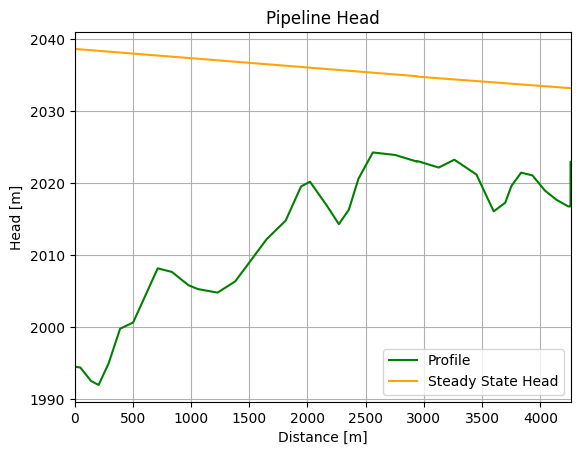

In [16]:
steady_to_delivery1, profile_to_delivery1 = wandalib.get_head_steady(wanda_basemodel, PIPE)
wandalib.graph.graph_steady_head(steady_to_delivery1, profile_to_delivery1)

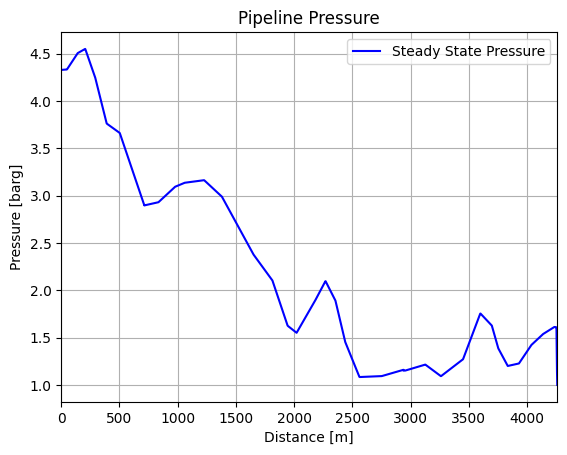

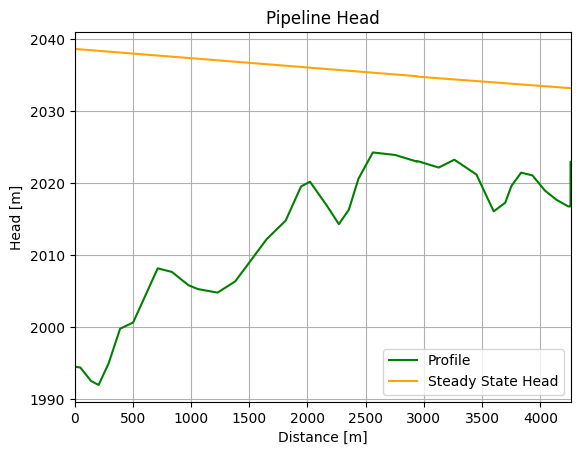

In [17]:
wandalib.get_steady_results(wanda_basemodel, PIPE)
print("")

In [18]:
from wandalib import Scenario, create_scenarios, assign_closing_time

transient_scenarios =[
    Scenario(
        scenario_name="CLOSURE_VALVE_STANDARD_1",
        parameters={
            "VALVE STANDARD 1": {
                "Action table": assign_closing_time(20)
                }
            }
        ), 
    # Scenario(
    #     scenario_name="CLOSURE_VALVE_STANDARD_2",
    #     parameters={
    #         "VALVE STAMNDARD 2": {
    #             "Action table": assign_closing_time(64)
    #             }
    #         }
    #     )
    ]
create_scenarios(wanda_file, transient_scenarios, wanda_bin, isUnsteady=True)

Directory 'transient_results' already exists.
C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template_example\wanda_file\Example_Model.wdi
C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template_example\wanda_file\transient_results\CLOSURE_VALVE_STANDARD_1.wdi
C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template_example\wanda_file\Example_Model.wdx
C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template_example\wanda_file\transient_results\CLOSURE_VALVE_STANDARD_1.wdx
Scenario CLOSURE_VALVE_STANDARD_1 created in path C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template_example\wanda_file\transient_results\CLOSURE_VALVE_STANDARD_1.wdi from wandabin C:\Program Files (x86)\Deltares\Wanda 4.7\Bin\\
Scenario CLOSURE_VALVE_STANDARD_1 created in path C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template_example\wanda_file
Running scenario...
<WandaModel object: C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template_example\wanda_file\transien

RuntimeError: Error during license checkout: [dauth.dll]
[19-08-2025 15:59:02] FlexNet::checkoutLicense checkout failed (-5) FlexNet error message: No such feature exists.
Feature:       WANDA_MODEL_ENGINE
License path:  C:\Program Files (x86)\DS_Flex\1_wanda_api_license.lic;C:\Program Files (x86)\DS_Flex\Wanda_S_C4CBE1CD0D56.lic;
FlexNet Licensing error:-5,147

[dauth_client]
[19-08-2025 15:59:02] could not checkout/borrow license (-21)
